In [73]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#neighbors
from sklearn.neighbors import KNeighborsRegressor
#neural_network
from sklearn.neural_network import MLPRegressor
#Support Vector Machine
from sklearn.svm import SVR,LinearSVR
#ensemble
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
#xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
models={'Linear Regression':LinearRegression(),
       'KNeighborsRegressor':KNeighborsRegressor(),
       'MLPRegressor':MLPRegressor(),
       'Support Vector Machine':SVR(),
       'Support Vector Machine (Linear)':LinearSVR(),
       'Random Forest':RandomForestRegressor(),
       'Gradient Boosting Regressor':GradientBoostingRegressor(),
       'XGBoost':XGBRegressor(),
       'Light GBM':LGBMRegressor(),
       'Cat Boost':CatBoostRegressor()}

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
!unzip /content/gdrive/MyDrive/DATA/vehicles.csv.zip

Archive:  /content/gdrive/MyDrive/DATA/vehicles.csv.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [78]:
!unzip /content/gdrive/MyDrive/DATA/vehicles.csv.zip> /dev/null


replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [79]:
df =pd.read_csv("vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [80]:
df


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [82]:
df.isna().mean()

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [83]:
df.shape

(426880, 26)

In [84]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [85]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [86]:
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size'], axis=1, inplace=True)

In [87]:
df['year'] = 2022-df['year']

In [88]:
df = df.dropna(subset=['year', 'odometer'])

In [89]:
df.fillna('n/a', inplace=True)

<ipython-input-89-904d1f626374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('n/a', inplace=True)


In [90]:
df['condition'].value_counts()

n/a          170493
good         121235
excellent     99765
like new      21178
fair           6769
new            1303
salvage         601
Name: condition, dtype: int64

In [91]:
df['type'].value_counts()

n/a            91782
sedan          85760
SUV            76066
pickup         42686
truck          35231
other          21698
coupe          18986
hatchback      16505
wagon          10649
van             8423
convertible     7659
mini-van        4773
offroad          609
bus              517
Name: type, dtype: int64

In [92]:
df['paint_color'].value_counts()

n/a       128090
white      78268
black      62017
silver     42481
blue       30925
red        30163
grey       24086
green       7295
custom      6699
brown       6553
yellow      2119
orange      1970
purple       678
Name: paint_color, dtype: int64

In [93]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [94]:
rg = df['region'].value_counts()

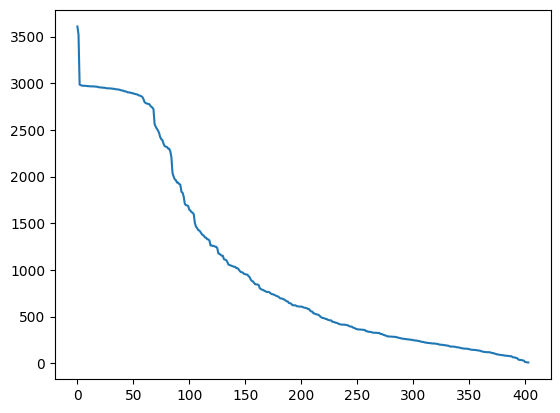

In [95]:
plt.plot(range(len(rg)), rg)

In [96]:
df['region'] = df['region'].apply(lambda s: s if str(s) in rg[:50] else 'others')

<ipython-input-96-3fcfcbd788b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['region'].apply(lambda s: s if str(s) in rg[:50] else 'others')


In [97]:
rg

columbus                   3608
jacksonville               3522
spokane / coeur d'alene    2985
new hampshire              2979
sarasota-bradenton         2975
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [98]:
mf = df['manufacturer'].value_counts()

In [99]:
mf


ford               70313
chevrolet          54414
toyota             33790
honda              21026
nissan             18818
jeep               18814
ram                18227
gmc                16609
n/a                16267
bmw                14609
dodge              13546
mercedes-benz      11595
hyundai            10223
subaru              9422
volkswagen          9252
kia                 8352
lexus               8132
audi                7528
cadillac            6871
chrysler            5956
acura               5938
buick               5452
mazda               5373
infiniti            4773
lincoln             4182
volvo               3358
mitsubishi          3280
mini                2368
pontiac             2277
rover               2091
jaguar              1941
porsche             1375
mercury             1184
saturn              1081
alfa-romeo           892
tesla                866
fiat                 790
harley-davidson      153
ferrari               95
datsun                63


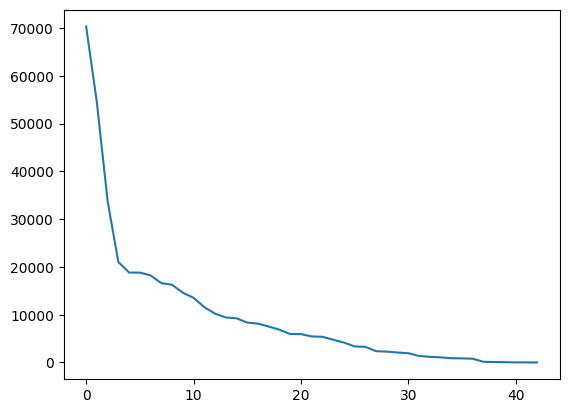

In [100]:
plt.plot(range(len(mf)), mf)

In [101]:
df['manufacturer'] = df['manufacturer'].apply(lambda s: s if str(s) in mf[:10] else 'others')

<ipython-input-101-c4570db2fbfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['manufacturer'] = df['manufacturer'].apply(lambda s: s if str(s) in mf[:10] else 'others')


In [102]:
mf


ford               70313
chevrolet          54414
toyota             33790
honda              21026
nissan             18818
jeep               18814
ram                18227
gmc                16609
n/a                16267
bmw                14609
dodge              13546
mercedes-benz      11595
hyundai            10223
subaru              9422
volkswagen          9252
kia                 8352
lexus               8132
audi                7528
cadillac            6871
chrysler            5956
acura               5938
buick               5452
mazda               5373
infiniti            4773
lincoln             4182
volvo               3358
mitsubishi          3280
mini                2368
pontiac             2277
rover               2091
jaguar              1941
porsche             1375
mercury             1184
saturn              1081
alfa-romeo           892
tesla                866
fiat                 790
harley-davidson      153
ferrari               95
datsun                63


In [103]:
md = df['model'].value_counts()

In [104]:
md

f-150                                        7870
n/a                                          5195
silverado 1500                               5043
1500                                         4178
camry                                        3070
                                             ... 
camry trd v6                                    1
es 250                                          1
1998 Mack                                       1
f-550 service truck under deck compressor       1
Paige Glenbrook Touring                         1
Name: model, Length: 29237, dtype: int64

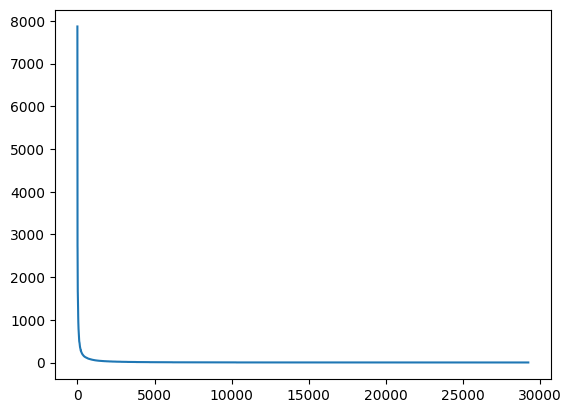

In [105]:
plt.plot(range(len(md)), md)

In [106]:
df['model'] = df['model'].apply(lambda s: s if str(s) in md[:50] else 'others')

<ipython-input-106-0208bb437ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].apply(lambda s: s if str(s) in md[:50] else 'others')


In [107]:
md

f-150                                        7870
n/a                                          5195
silverado 1500                               5043
1500                                         4178
camry                                        3070
                                             ... 
camry trd v6                                    1
es 250                                          1
1998 Mack                                       1
f-550 service truck under deck compressor       1
Paige Glenbrook Touring                         1
Name: model, Length: 29237, dtype: int64

In [108]:
for i in df.columns:
  print(i, len(df[i].value_counts().index))

region 51
price 15508
year 113
manufacturer 11
model 51
condition 7
cylinders 9
fuel 6
odometer 104630
title_status 7
transmission 4
drive 4
type 14
paint_color 13
state 51


In [109]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [110]:
df.describe()

,price,year,odometer
count,4.213440e+05,421344.000000,4.213440e+05
mean,7.598356e+04,10.774756,9.822513e+04
std,1.226205e+07,9.463345,2.141207e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,5.975000e+03,5.000000,3.795100e+04
50%,1.398800e+04,9.000000,8.582750e+04
75%,2.649500e+04,14.000000,1.338000e+05
max,3.736929e+09,122.000000,1.000000e+07


In [111]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.1)
print(p1)
print(p2)

66858.5500000001
700.0


In [112]:
df = df[(df['price']<p1) & (df['price']>p2)]

In [113]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.05)
print(o1, o2)

280000.0 7526.0


In [114]:
df = df[(df['odometer']<o1) & (df['odometer']>o2)]

In [115]:
df.describe()

,price,year,odometer
count,352263.000000,352263.000000,352263.000000
mean,18308.145579,10.961892,96831.863832
std,12927.937032,8.689395,58827.170476
min,702.000000,0.000000,7528.000000
25%,7800.000000,6.000000,45500.000000
50%,15000.000000,9.000000,92661.000000
75%,26987.000000,14.000000,138000.000000
max,66850.000000,122.000000,279974.000000


In [116]:
df.shape

(352263, 15)

Visualization


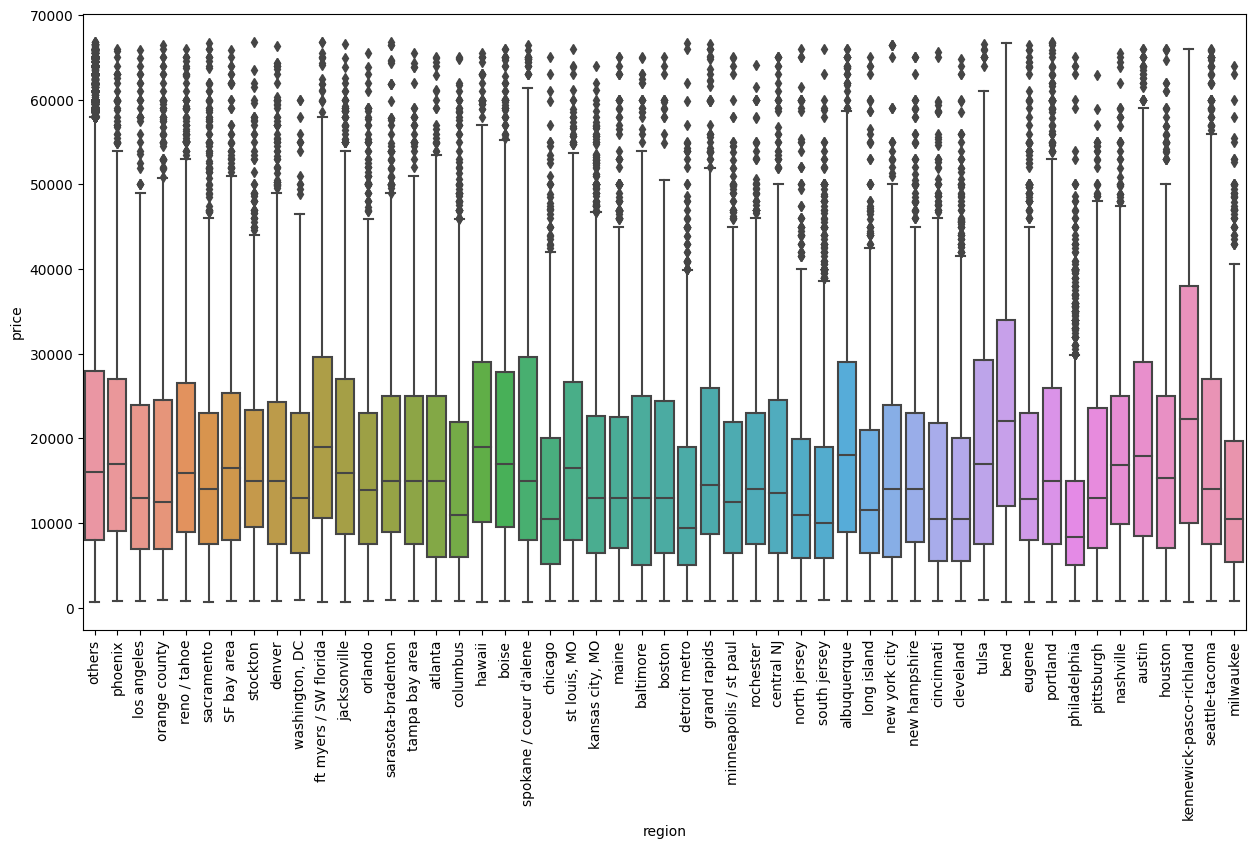

In [117]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='region', y='price')
plt.xticks(rotation=90)
plt.show()

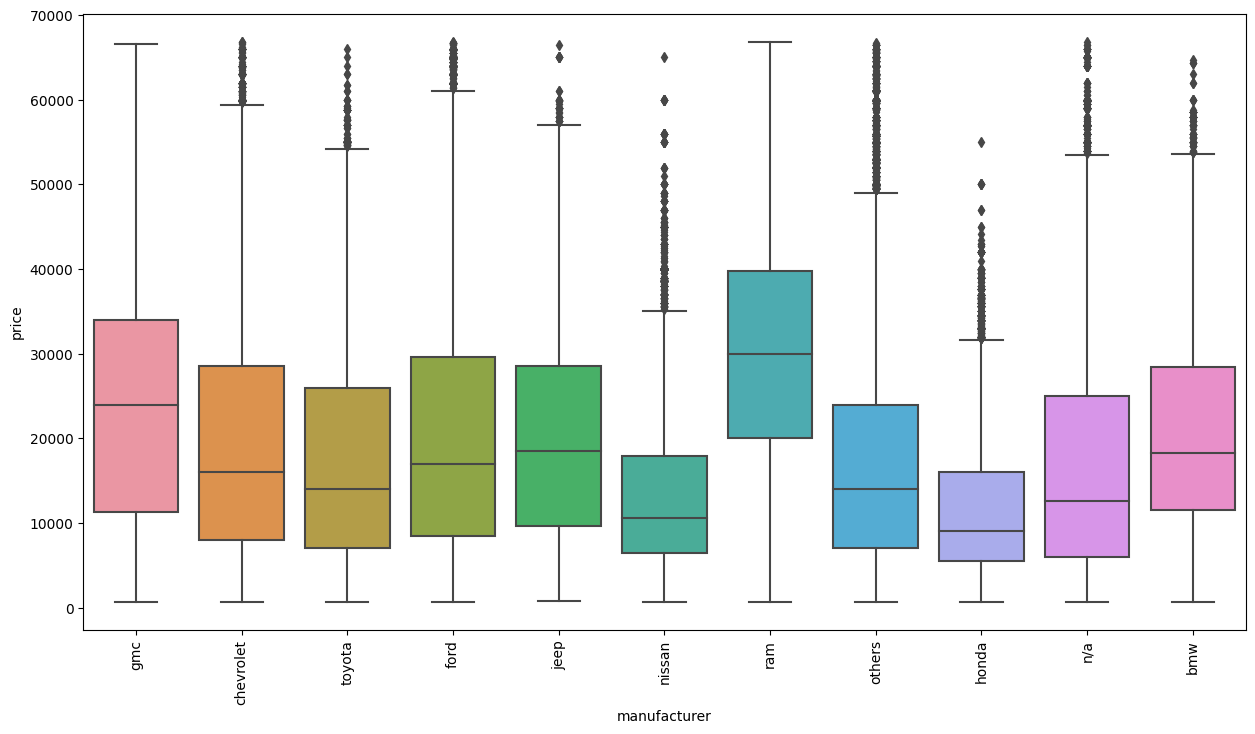

In [118]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

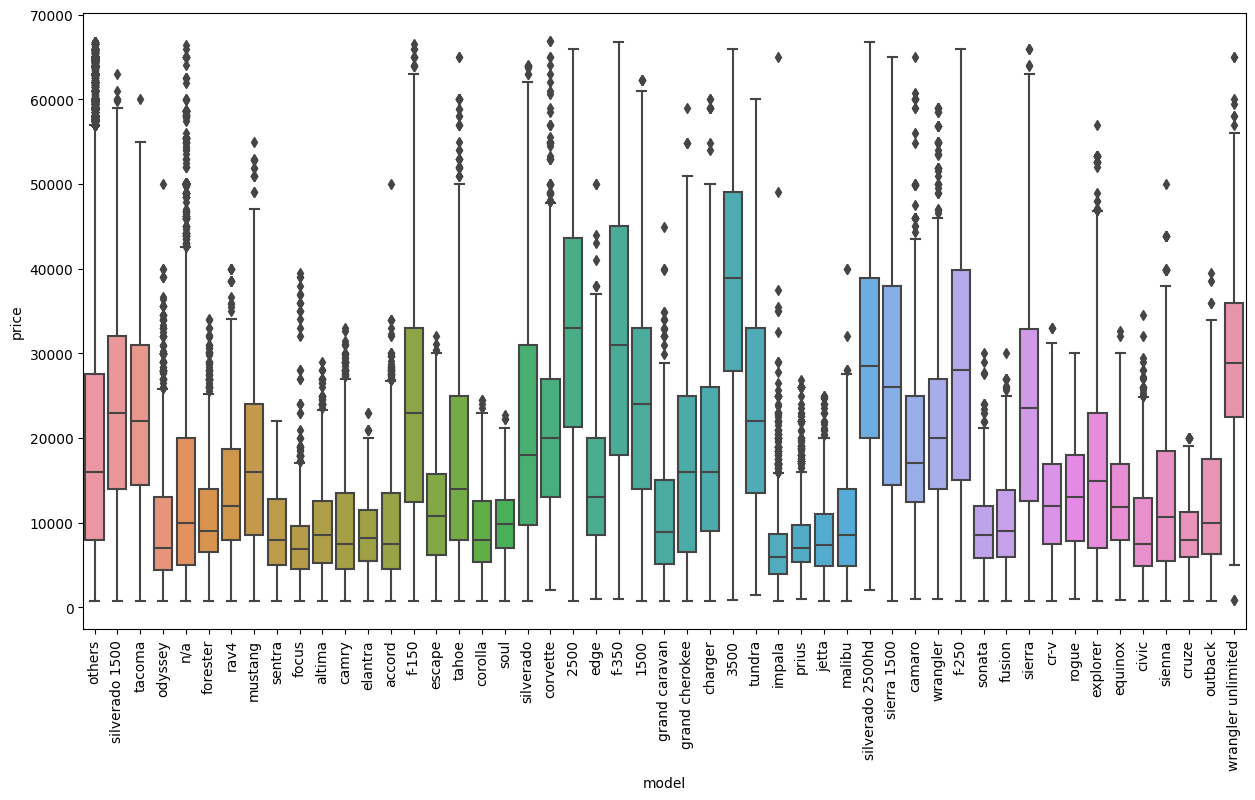

In [119]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='model', y='price')
plt.xticks(rotation=90)
plt.show()

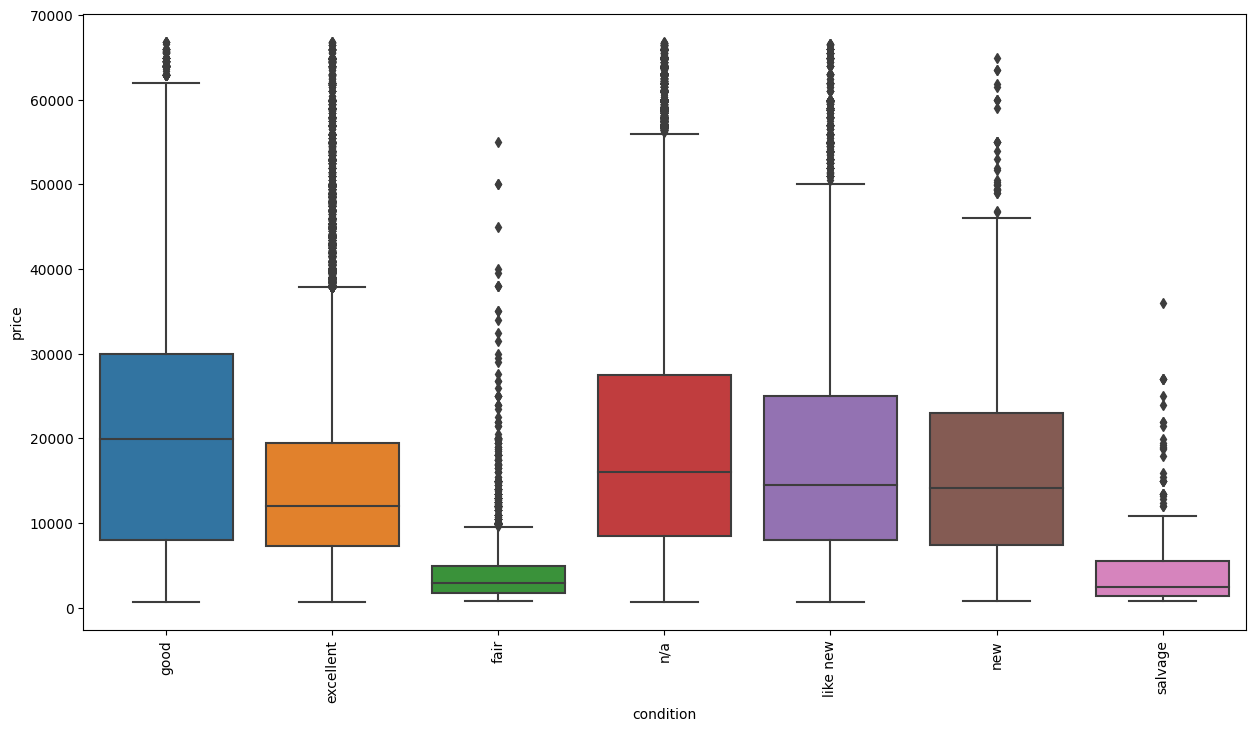

In [120]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='condition', y='price')
plt.xticks(rotation=90)
plt.show()

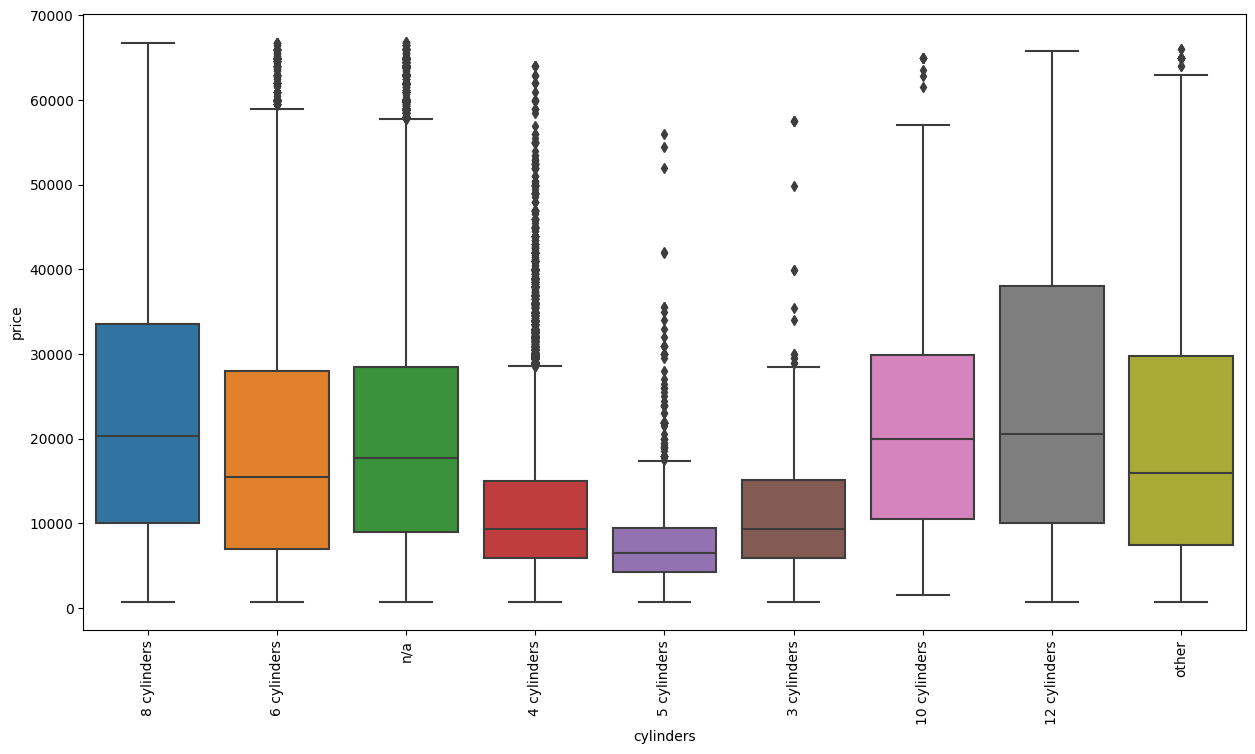

In [121]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cylinders', y='price')
plt.xticks(rotation=90)
plt.show()

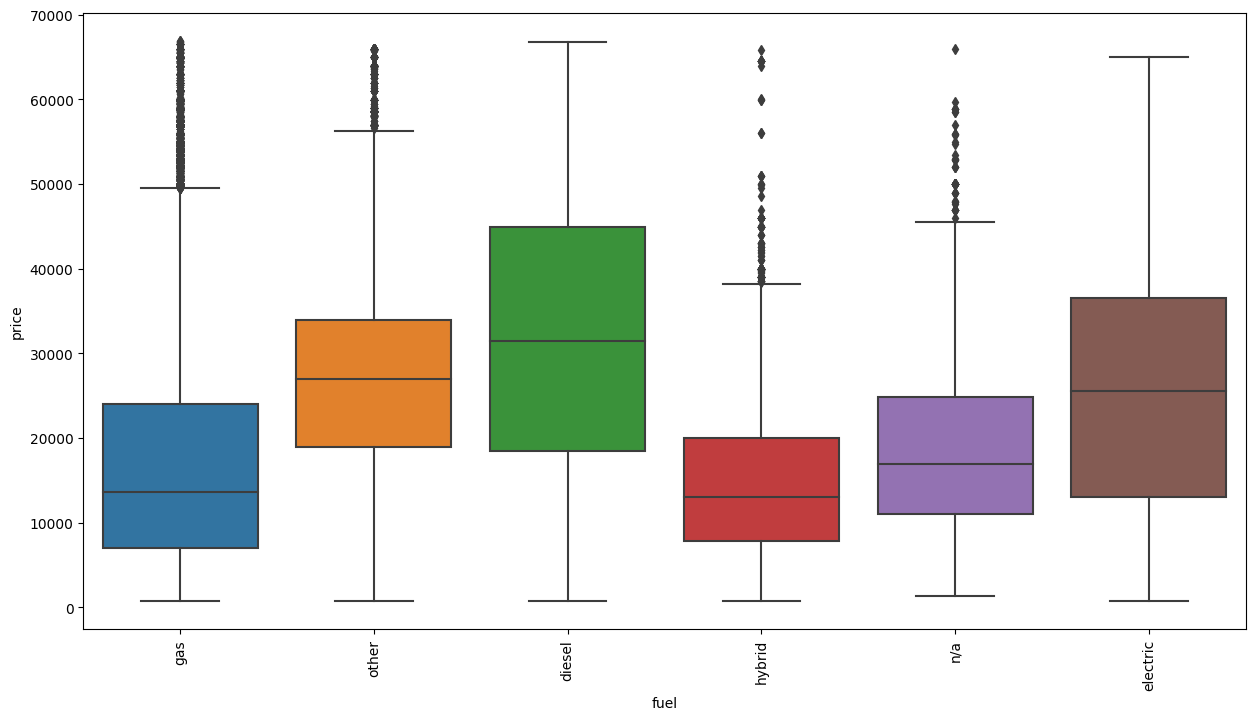

In [122]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='fuel', y='price')
plt.xticks(rotation=90)
plt.show()

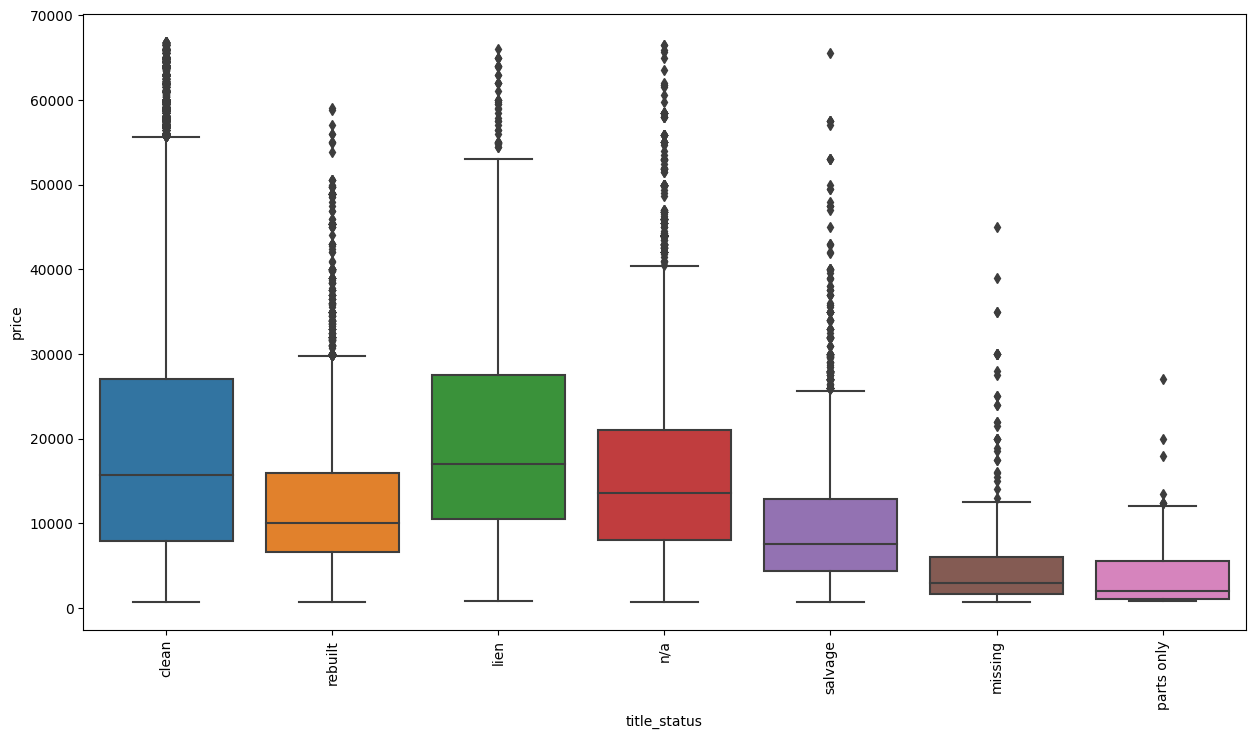

In [123]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='title_status', y='price')
plt.xticks(rotation=90)
plt.show()

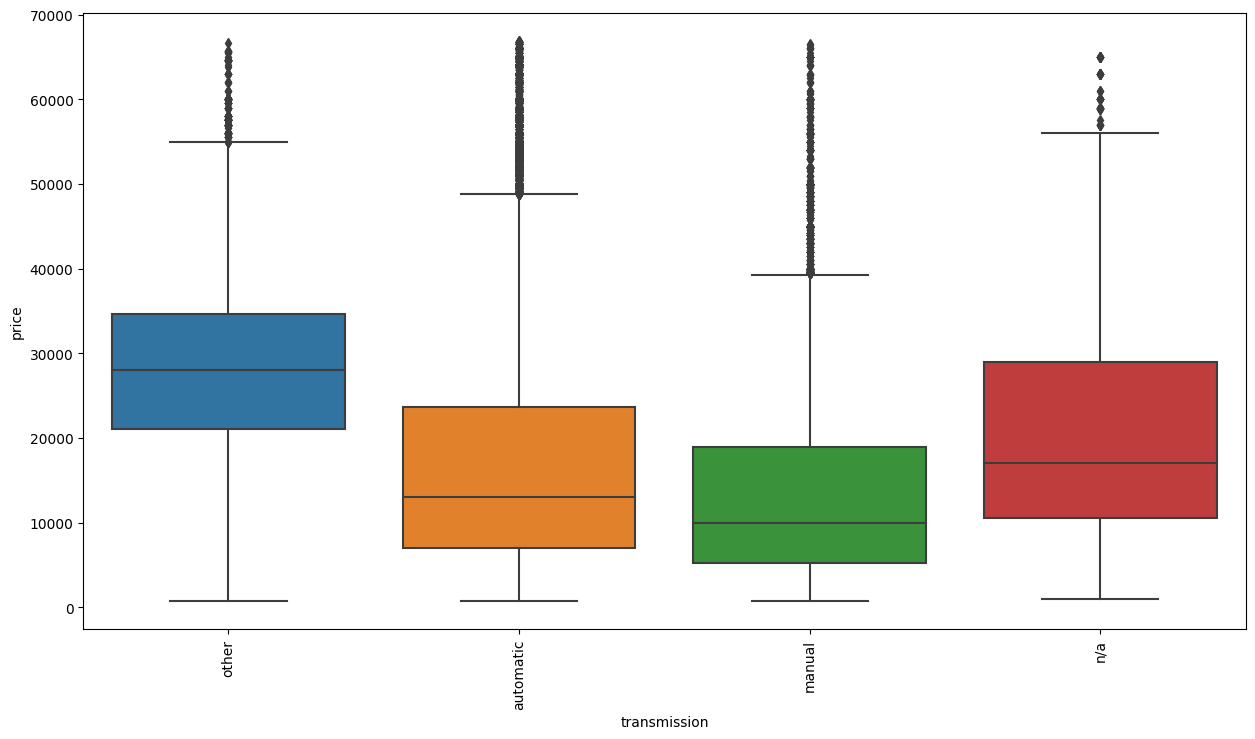

In [124]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='transmission', y='price')
plt.xticks(rotation=90)
plt.show()

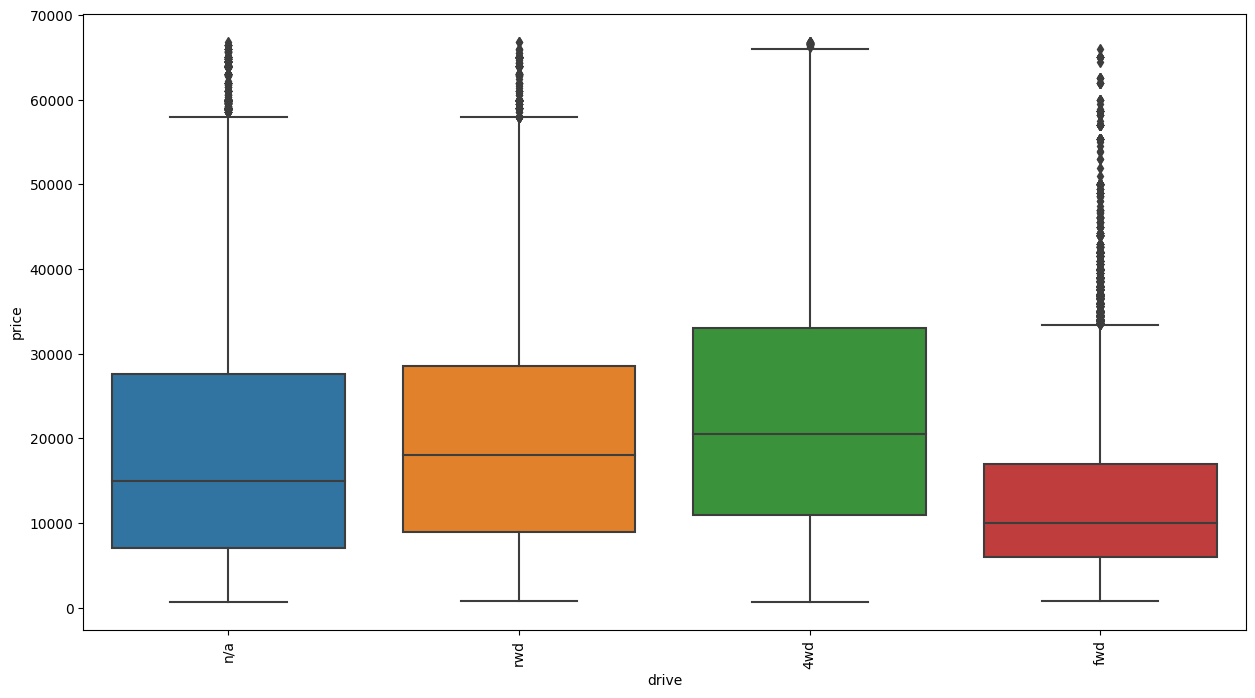

In [125]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='drive', y='price')
plt.xticks(rotation=90)
plt.show()

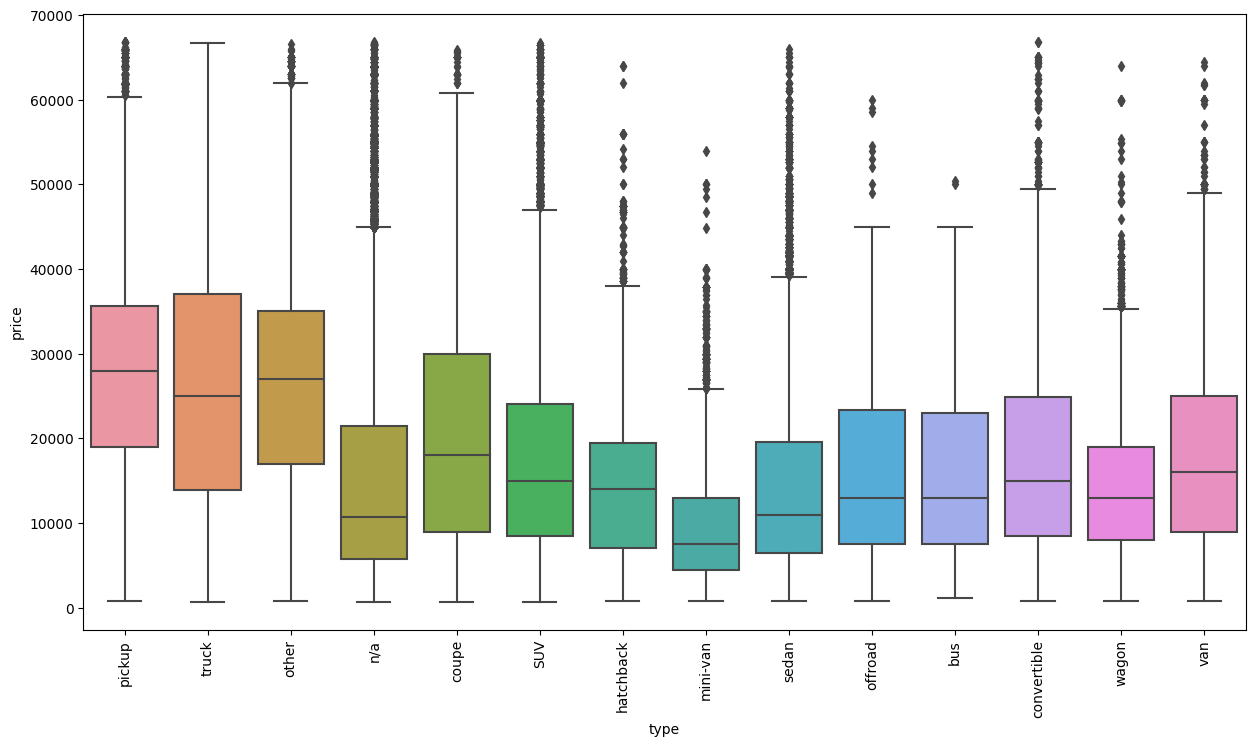

In [126]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='type', y='price')
plt.xticks(rotation=90)
plt.show()

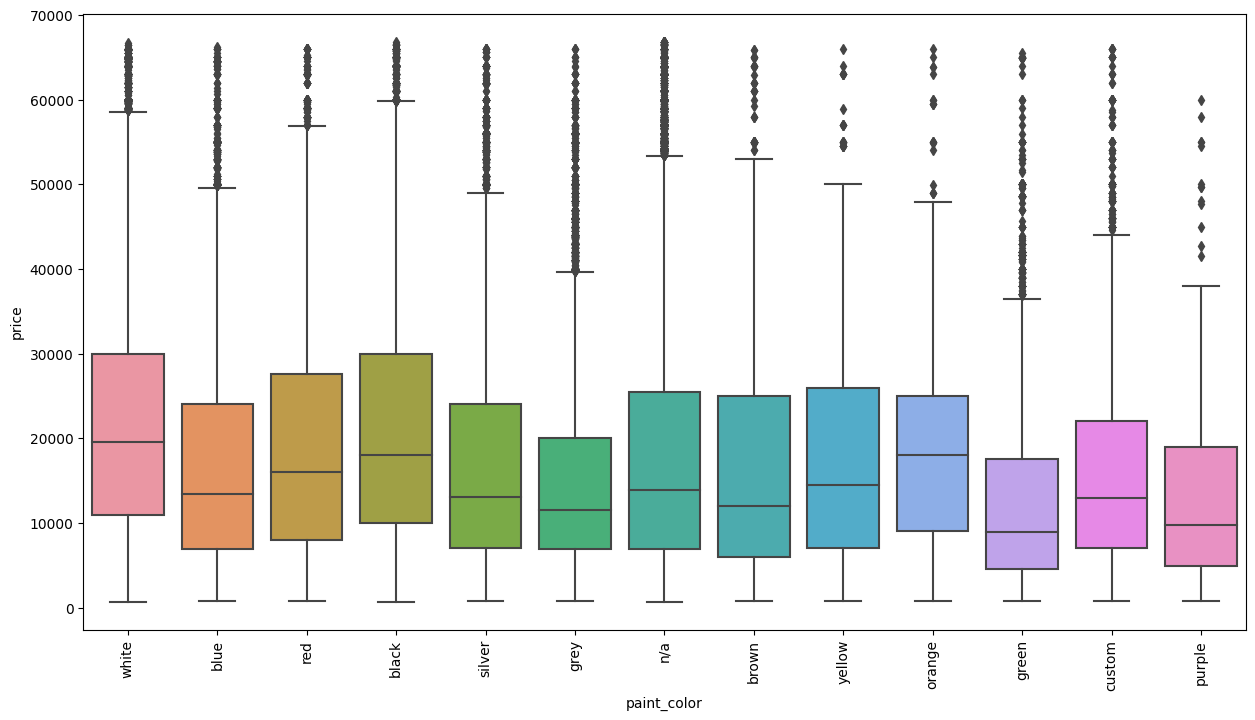

In [127]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='paint_color', y='price')
plt.xticks(rotation=90)
plt.show()

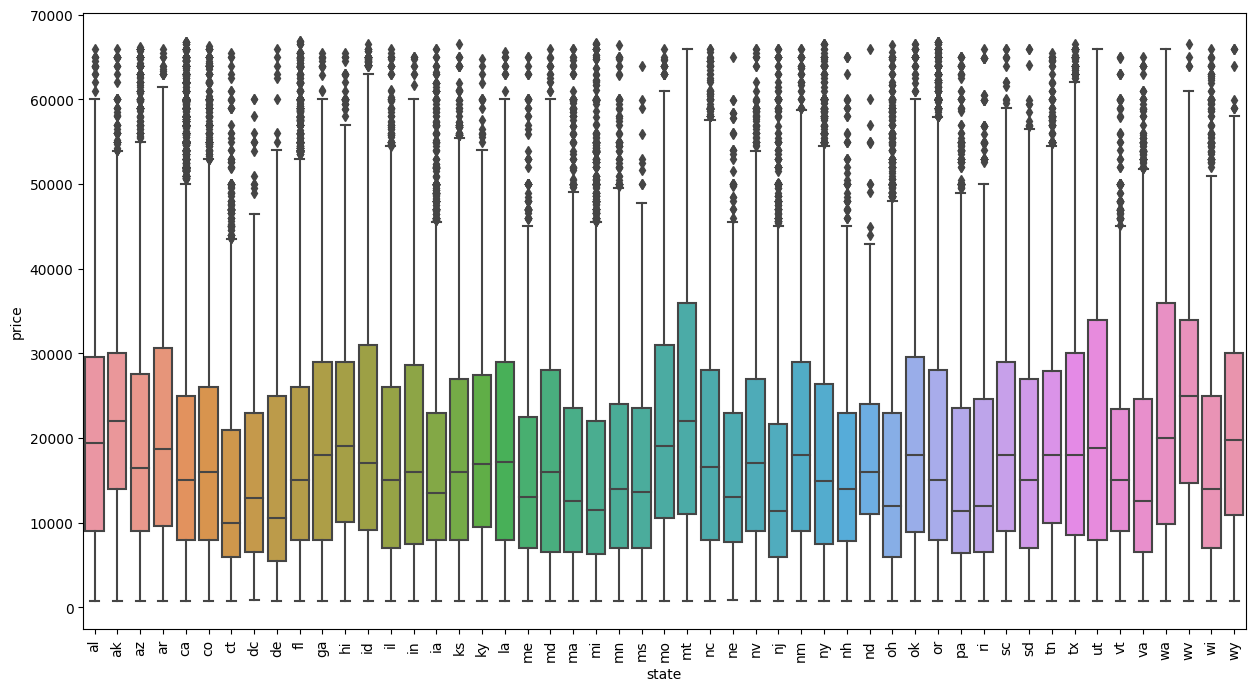

In [128]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='state', y='price')
plt.xticks(rotation=90)
plt.show()

<ipython-input-129-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

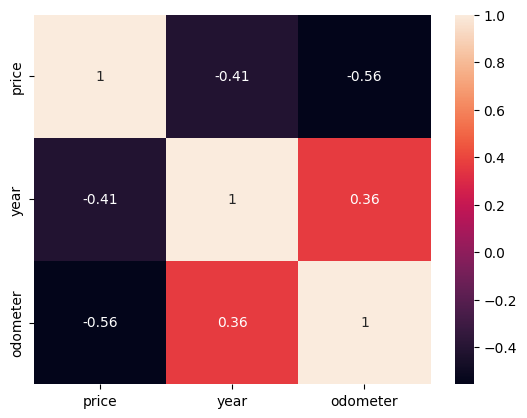

In [129]:
sns.heatmap(df.corr(), annot=True)

In [130]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [131]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [132]:
X_num = df[['odometer', 'year']]
X_cat = df.drop(['odometer', 'year', 'price'], axis=1)

In [133]:
for i in X_cat.columns:
  le = LabelEncoder()
  X_cat[i] = le.fit_transform(X_cat[i])


In [134]:
X_cat.head()

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
27,34,3,32,2,6,2,0,3,2,9,11,1
28,34,1,42,2,6,2,0,3,2,9,1,1
29,34,1,32,2,6,2,0,3,2,9,9,1
30,34,10,32,2,6,2,0,3,2,9,9,1
31,34,2,32,0,5,2,0,0,3,11,0,1


In [135]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [136]:
X.head()

,odometer,year,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
27,-0.661411,-0.340863,34,3,32,2,6,2,0,3,2,9,11,1
28,-0.435222,0.119469,34,1,42,2,6,2,0,3,2,9,1,1
29,-1.320342,-1.031361,34,1,32,2,6,2,0,3,2,9,9,1
30,-0.946976,-0.686112,34,10,32,2,6,2,0,3,2,9,9,1
31,0.529826,-0.225780,34,2,32,0,5,2,0,0,3,11,0,1


In [137]:
X.isna().sum()

odometer        0
year            0
region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [140]:
model_lgb = lgb.LGBMRegressor()

In [141]:
param={
    'num_leaves':[32,64],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[50, 100]
}

In [142]:
GS_LGB = GridSearchCV(model_lgb, param, cv=10, n_jobs=10)
GS_LGB.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=10,
             param_grid={'colsample_bytree': [0.8, 1],
                         'min_data_in_leaf': [1, 5, 10],
                         'n_estimators': [50, 100], 'num_leaves': [32, 64]})

In [143]:
GS_LGB.best_params_

{'colsample_bytree': 0.8,
 'min_data_in_leaf': 10,
 'n_estimators': 100,
 'num_leaves': 64}

In [144]:
accuracy = GS_LGB.score(X_test, y_test)
print(accuracy)

0.8248797850170978


In [145]:
pred = GS_LGB.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

3608.4758885839537
5427.4369611172315


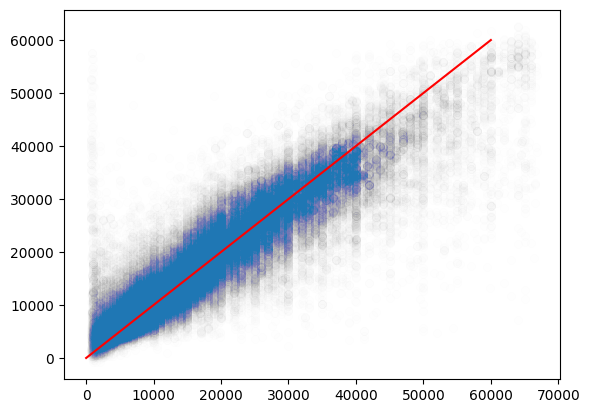

In [146]:
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0, 60000], [0,60000], 'r-')

44733    -21.245921
335133    16.060810
353289    23.731986
111492   -17.209062
209700   -43.317181
            ...    
242455    28.791539
387748   -18.982297
97327      4.942407
225782     4.406612
3951     -14.583447
Name: price, Length: 105679, dtype: float64


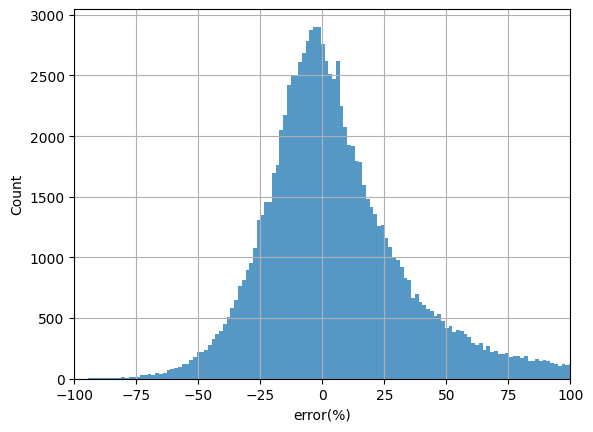

In [147]:
err = (pred-y_test)/y_test*100
print(err)
sns.histplot(err)
plt.xlabel('error(%)')
plt.xlim(-100, 100)
plt.grid()

<BarContainer object of 14 artists>

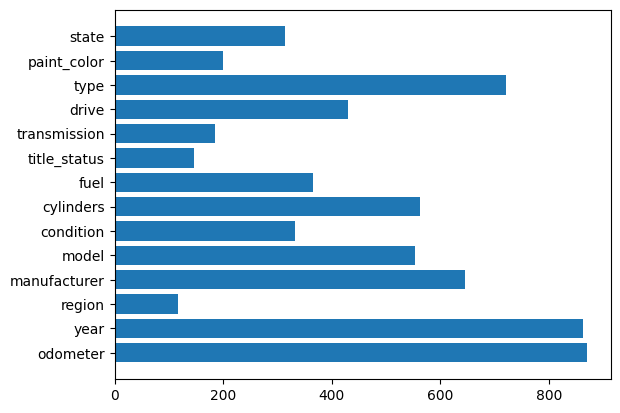

In [148]:
plt.barh(X.columns, GS_LGB.best_estimator_.feature_importances_)